In [54]:
import cv2 as cv
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image

train_str = "train"
path_to_images = f"../data/fretboard_dataset/fretboard_frames_{train_str}/"
image_fns = os.listdir(path_to_images)
json_fp = os.path.join(path_to_images, f"fretboard_labels_{train_str}_vgg.json")
f = open(json_fp)
data = json.load(f)

for fn in image_fns:
    img_path = os.path.join(path_to_images, fn)
    img = np.asarray(Image.open(img_path)) # loads images w/ range of 0:255
    x_list = data[fn]["regions"]["0"]["shape_attributes"]["all_points_x"]
    y_list = data[fn]["regions"]["0"]["shape_attributes"]["all_points_y"]
    x_list.pop(-1)
    y_list.pop(-1)
    poly_corners = np.asarray([list(zip(x_list, y_list))], dtype=np.int32)
    new_img = np.zeros((img.shape[0], img.shape[1]), np.uint8)
    new_img = cv.fillPoly(new_img, poly_corners, 255)

fileref 
size 1680379
filename 0_9.png
base64_img_data 
file_attributes {}
regions {'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [760.1731601731597, 742.8571428571423, 1473.5930735930726, 1481.6738816738807, 760.1731601731597], 'all_points_y': [643.8672438672435, 739.6825396825392, 841.8470418470413, 769.6969696969692, 643.8672438672435]}, 'region_attributes': {'label': 'fret'}}}
643.8672438672435
739.6825396825392
841.8470418470413
769.6969696969692
643.8672438672435


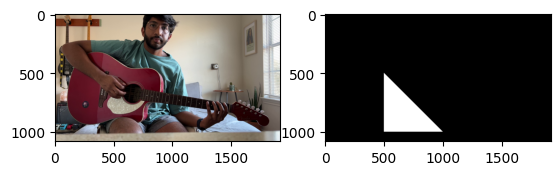

In [70]:
# img = plt.imread("../data/fretboard_dataset/fretboard_frames_train/0_0.png")
img = Image.open("../data/fretboard_dataset/fretboard_frames_train/0_0.png")
img = np.asarray(img)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
new_img = np.zeros([img.shape[0], img.shape[1]], dtype=np.uint8)
coords = np.array([[[500, 500], [500, 1000], [1000, 1000]]], dtype=np.int32)
new_img = cv.fillPoly(new_img, coords, 255)
plt.imshow(new_img, cmap="gray")

In [72]:
l1 = [1,2,3,4]
l2 = [5,6,7,8]
l1.pop(-1)
print(l1)

[1, 2, 3]
